# EV: Regression Analysis

## Table of content

1. Importing libraries and dataframe

2. Data cleaning

3. Data preparation for regression analysis

4. Regression Analysis

# 1. Importing libraries and dataframe 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

#### Importing the car dataframe

In [3]:
# Creating shortcut path to data
path_data = r'C:\Users\henri\Documents\Tonia\Learning\CarrrerFoundry\Data Immersion\Achievement 6\EV Analysis in EU\02 Data'

In [4]:
path_data

'C:\\Users\\henri\\Documents\\Tonia\\Learning\\CarrrerFoundry\\Data Immersion\\Achievement 6\\EV Analysis in EU\\02 Data'

In [5]:
# Importing ev_new_variable.pkl
car_df = pd.read_pickle(os.path.join(path_data, 'Prepared Data', 'ev_new_variable.pkl'))

In [6]:
car_df.head()

,engine_type_code,country_code,year,new_car,stock_car,gdp_eur,age_code,income_indicator,currency,income,demographic_indicator_code,population,engine,country,age_group,country_group,gdp_per_capita,new_car_per_1000,stock_car_per_1000
0,ALT,AL,2019,3757.0,35881.0,13754.2,TOTAL,Median,EUR,2231.0,AVG,2854191.0,Other,Albania,Total,other,4.818949e-09,1.31631,12.571338
1,ALT,AL,2019,3757.0,35881.0,13754.2,TOTAL,Median,PPS,4252.0,AVG,2854191.0,Other,Albania,Total,other,4.818949e-09,1.31631,12.571338
2,ALT,AL,2019,3757.0,35881.0,13754.2,TOTAL,Mean,EUR,2619.0,AVG,2854191.0,Other,Albania,Total,other,4.818949e-09,1.31631,12.571338
3,ALT,AL,2019,3757.0,35881.0,13754.2,TOTAL,Mean,PPS,4992.0,AVG,2854191.0,Other,Albania,Total,other,4.818949e-09,1.31631,12.571338
4,ALT,AL,2019,3757.0,35881.0,13754.2,Y18-64,Median,EUR,2319.0,AVG,2854191.0,Other,Albania,18-64,other,4.818949e-09,1.31631,12.571338


In [7]:
car_df.shape

(89229, 19)

# 2. Data cleaning

#### Preparing the data to have only electric vehicles in order to check the hypothesis in point 3.

In [12]:
car_df_for_test = car_df[car_df['engine'] == 'Electric']

In [13]:
car_df_for_test['engine'].value_counts(dropna=False)

Electric    6638
Name: engine, dtype: int64

#### Checking missing values

I am going to check and remove missing values for the GDP_per_capita and new_car_per_1000 columns, as we cannot do the regression testing with null values.

In [24]:
# Check for missing values

car_df_for_test.isnull().sum()

engine_type_code                 0
country_code                     0
year                             0
new_car                       1955
stock_car                      380
gdp_eur                       1231
age_code                        38
income_indicator                38
currency                        38
income                          38
demographic_indicator_code       5
population                       5
engine                           0
country                          0
age_group                       38
country_group                    0
gdp_per_capita                1235
new_car_per_1000              1960
stock_car_per_1000             385
dtype: int64

In [25]:
# Checking number of rows and columns of car df for testing
car_df_for_test.shape

(6638, 19)

In [52]:
# Removing missing values for "new_car" column
car_df_for_test = car_df_for_test[car_df_for_test['new_car_per_1000'].isnull() == False]

In [53]:
# Checking number of rows and columns after removal of the null values for new_car
car_df_for_test.shape

(4677, 19)

In [54]:
# Another check for missing values

car_df_for_test.isnull().sum()

engine_type_code                0
country_code                    0
year                            0
new_car                         0
stock_car                     320
gdp_eur                         0
age_code                       17
income_indicator               17
currency                       17
income                         17
demographic_indicator_code      0
population                      0
engine                          0
country                         0
age_group                      17
country_group                   0
gdp_per_capita                  0
new_car_per_1000                0
stock_car_per_1000            320
dtype: int64

The remaining null values have no impact on the analysis, so I will leave them as they are.

#### Extreme values

C:\Users\henri\AppData\Local\Temp\ipykernel_12312\4220024665.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_df_for_test['new_car_per_1000'], bins=25) # Shows extreme values


<Axes: xlabel='new_car_per_1000', ylabel='Density'>

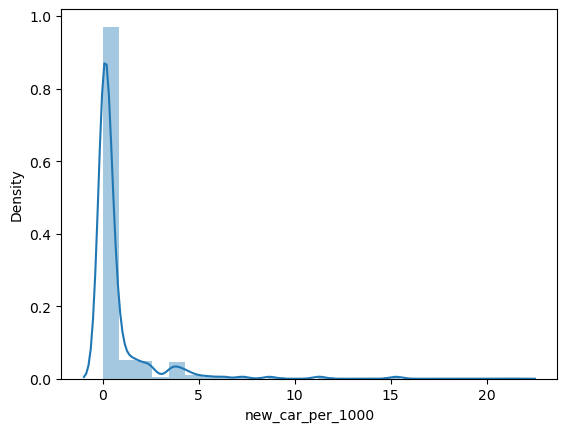

In [55]:
sns.distplot(car_df_for_test['new_car_per_1000'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

# 3. Data preparation for regression analysis 

##### Hypothesis
The higher the GDP per capita, the higher sales of the new electric vehicles.

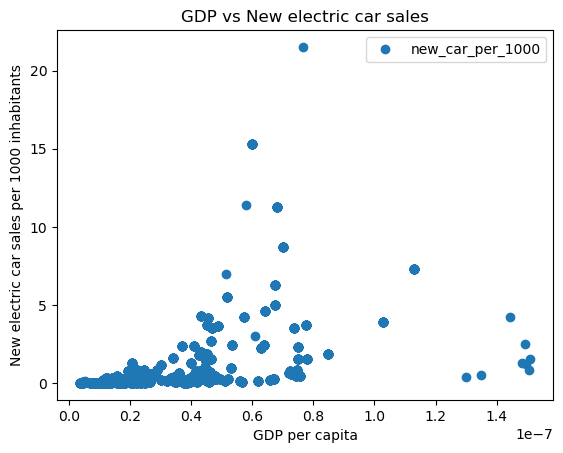

In [75]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

car_df_for_test.plot(x = 'gdp_per_capita', y='new_car_per_1000',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP vs New electric car sales')  
plt.xlabel('GDP per capita')  
plt.ylabel('New electric car sales per 1000 inhabitants')  
plt.show()

In [57]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = car_df_for_test['gdp_per_capita'].values.reshape(-1,1)
y = car_df_for_test['new_car_per_1000'].values.reshape(-1,1)

In [58]:
X

array([[4.81894870e-09],
       [4.81894870e-09],
       [4.81894870e-09],
       ...,
       [3.71239885e-09],
       [3.71239885e-09],
       [3.94445497e-09]])

In [59]:
y

array([[0.00840869],
       [0.00840869],
       [0.00840869],
       ...,
       [0.00055646],
       [0.00055646],
       [0.        ]])

In [60]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression Analysis

In [61]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [62]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [63]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

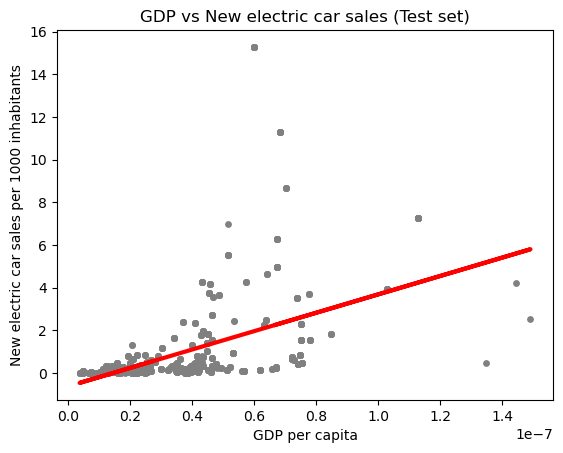

In [76]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP vs New electric car sales (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('New electric car sales per 1000 inhabitants')
plot_test.show()

In [81]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [82]:
# Print the model summary statistics. 

print('Slope:', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[43116400.73005435]]
Mean squared error:  2.6624878275911734
R2 score:  0.28203542158103034


The slope (or regression coefficient) is positive, so we have a positive relation between the two variables: the higher the GDP per capita, the more new EV cars are sold per 1000 inhabitants.

The MSE (mean squared error) is quite big for our set of data, where the new ev sales per 1000 inhabitants varies between 0 and 16. Therefore, we can say that the regression may not be the best model to represent this data and cannot accurately predict the influence of GDP per capita on the new EV car sales per 1000 inhabitants.

The R2 score is 0.28, which indicates a poor fit for our model.

In [67]:
y_predicted

array([[ 0.51725832],
       [-0.02330661],
       [-0.03393485],
       ...,
       [ 0.23530758],
       [ 0.75495624],
       [ 2.25254045]])

In [68]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.086632,0.517258
1,0.312508,-0.023307
2,0.021110,-0.033935
3,0.015687,-0.095090
4,0.021600,0.324896
5,3.521546,2.543388
6,0.007174,0.088356
7,0.320712,-0.104132
8,0.251798,0.024603
9,0.207800,0.907260


### Compare how the regression fits the training set

In [69]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [70]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [71]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[43116400.73005435]]
Mean squared error:  2.1199514869454723
R2 score:  0.2611149597701341


The slope (or regression coefficient) is positive, so we have a positive relation between the two variables: the higher the GDP per capita, the more new EV cars are sold per 1000 inhabitants.

The MSE (mean squared error) is quite big for our set of data, where the new ev sales per 1000 inhabitants varies between 0 and 16. Therefore, we can say that the regression may not be the best model to represent this data and cannot accurately predict the influence of GDP per capita on the new EV car sales per 1000 inhabitants.

The R2 score is 0.26, which indicates a poor fit for our model.

The statistics for the training set are similar to the testing set. We can say with confidence that the model is not overfit. We can also say, that the relationship between the GDP per capita and the new EV car sales per 1000 inhabitants is not linear.

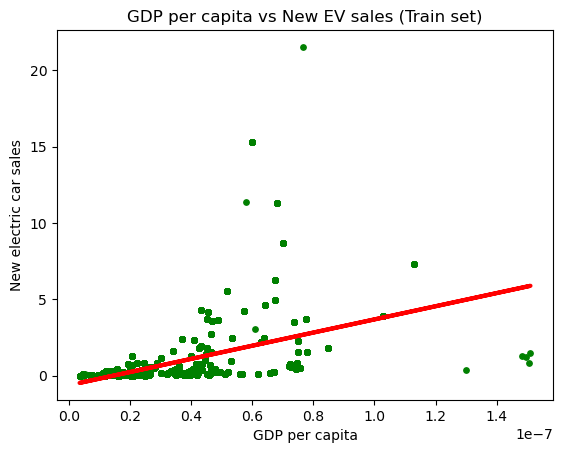

In [72]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per capita vs New EV sales (Train set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('New electric car sales')
plot_test.show()